In [8]:
import geopandas as gpd
import geodatasets
import folium
import matplotlib.pyplot as plt
import cartopy.crs as ccrs



In [24]:
# Load the low-resolution world boundaries dataset
world = gpd.read_file(geodatasets.get_path('naturalearth.land'))

# Preview
world.head()

,featurecla,scalerank,min_zoom,geometry
0,Land,1,1.0,"POLYGON ((-59.57209 -80.04018, -59.86585 -80.5..."
1,Land,1,1.0,"POLYGON ((-159.20818 -79.49706, -161.1276 -79...."
2,Land,1,0.0,"POLYGON ((-45.15476 -78.04707, -43.92083 -78.4..."
3,Land,1,1.0,"POLYGON ((-121.21151 -73.50099, -119.91885 -73..."
4,Land,1,1.0,"POLYGON ((-125.55957 -73.48135, -124.03188 -73..."


In [31]:
# Create a GeoDataFrame of cities (or load from file)
cities_data = {
'City': ['London', 'New York', 'Sydney', 'Delhi', 'Rio de Janeiro'],
'Country': ['UK', 'USA', 'Australia', 'India', 'Brazil'],
'Latitude': [51.5074, 40.7128, -33.8688, 28.7041, -22.9068],
'Longitude': [-0.1278, -74.0060, 151.2093, 77.1025, -43.1729]
}


# Convert pandas DataFrame to GeoDataFrame by creating a 'geometry' column of poi

cities = gpd.GeoDataFrame(cities_data,geometry=gpd.points_from_xy(cities_data['Longitude'], cities_data['Latitude']))
cities.head()

,City,Country,Latitude,Longitude,geometry
0,London,UK,51.5074,-0.1278,POINT (-0.1278 51.5074)
1,New York,USA,40.7128,-74.0060,POINT (-74.006 40.7128)
2,Sydney,Australia,-33.8688,151.2093,POINT (151.2093 -33.8688)
3,Delhi,India,28.7041,77.1025,POINT (77.1025 28.7041)
4,Rio de Janeiro,Brazil,-22.9068,-43.1729,POINT (-43.1729 -22.9068)


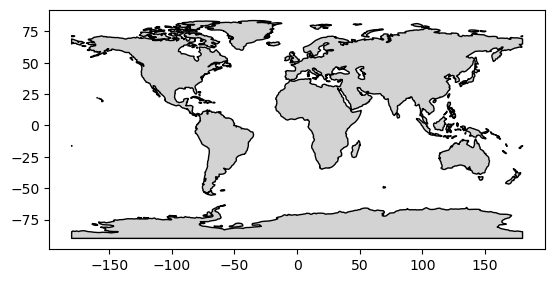

In [33]:
world.plot(color='lightgrey', edgecolor='black')
plt.show()

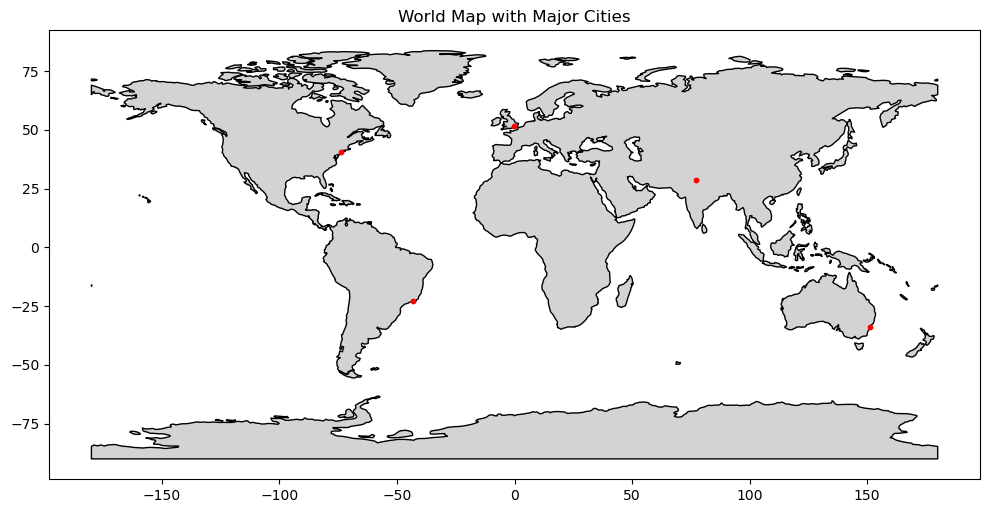

In [34]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))


# Plot the world map on the axis
world.plot(ax=ax, color='lightgrey', edgecolor='black')


# Overlay cities on the same axis
cities.plot(ax=ax, color='red', markersize=10)

# Optionally, set title and remove empty white space

plt.title('World Map with Major Cities')
plt.tight_layout()
plt.show()


In [37]:
world = gpd.read_file(r'C:\E\PyExC\Lec07_test\ne_110m_admin_0_countries.shp')
print(world.head())

        featurecla  scalerank  LABELRANK                   SOVEREIGNT SOV_A3  \
0  Admin-0 country          1          6                         Fiji    FJI   
1  Admin-0 country          1          3  United Republic of Tanzania    TZA   
2  Admin-0 country          1          7               Western Sahara    SAH   
3  Admin-0 country          1          2                       Canada    CAN   
4  Admin-0 country          1          2     United States of America    US1   

   ADM0_DIF  LEVEL               TYPE TLC                        ADMIN  ...  \
0         0      2  Sovereign country   1                         Fiji  ...   
1         0      2  Sovereign country   1  United Republic of Tanzania  ...   
2         0      2      Indeterminate   1               Western Sahara  ...   
3         0      2  Sovereign country   1                       Canada  ...   
4         1      2            Country   1     United States of America  ...   

      FCLASS_TR     FCLASS_ID     FCLASS_PL 

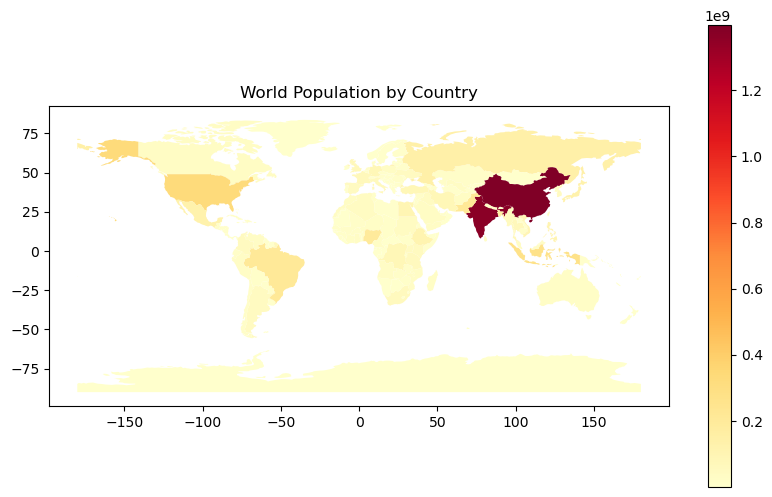

In [39]:
world.plot(column='POP_EST', cmap='YlOrRd', legend=True, figsize=(10, 6))
plt.title('World Population by Country')
plt.show()


C:\Users\cxl200029\AppData\Roaming\Python\Python313\site-packages\cartopy\io\__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
C:\Users\cxl200029\AppData\Roaming\Python\Python313\site-packages\cartopy\io\__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


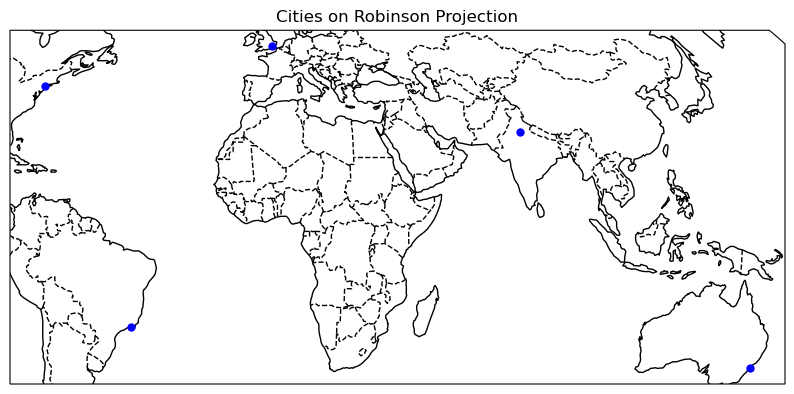

In [41]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson())


# Add coastlines and country borders
ax.coastlines(resolution='110m')
ax.add_feature(cfeature.BORDERS, linestyle='--')

# Plot cities. Cartopy requires specifying the data's CRS (which is PlateCarree
ax.plot(cities.geometry.x, cities.geometry.y, 'bo', markersize=5, transform=ccrs.PlateCarree())

plt.title('Cities on Robinson Projection')
plt.show()
